In [98]:
############

# SVM regression

###########

import warnings
warnings.filterwarnings('ignore')

In [99]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
sns.set(font_scale=2)
%matplotlib inline

In [100]:
data = pd.read_csv("S_n_I_A_N_P_An_Io_noaa2.txt",delimiter=' ',skipinitialspace=True, names = ['SAM', 'nino', 'ISMR', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD'],index_col = False,engine='python')
data

,SAM,nino,ISMR,AMO,NAO,PDO,At-nino,IOD
0,0.599257,0.167651,10.24380,0.484010,0.000837,1.084100,0.560382,-0.295856
1,0.663879,0.212788,44.16110,0.603261,-0.317969,-1.465790,1.189540,-0.032952
2,-0.428772,0.336627,4.76807,0.609364,0.423296,0.114019,0.783738,-0.644708
3,0.513283,0.575112,-63.58770,0.219494,0.352545,1.807430,0.560395,-0.295477
4,-0.260801,0.647786,12.57720,0.040233,-0.528239,-0.108867,0.727379,0.044719
...,...,...,...,...,...,...,...,...
865,1.147740,1.296340,23.70850,0.161498,-0.385948,0.108982,-0.079691,0.297551
866,1.579510,1.572200,-41.18450,0.174294,-0.945931,2.158290,-0.189664,0.441171
867,0.923487,2.007070,-56.14030,0.277507,0.413170,0.031796,-0.188361,0.534373
868,0.207229,2.259830,-43.77540,0.492069,-0.579453,-1.432400,0.008520,0.771095


<AxesSubplot:>

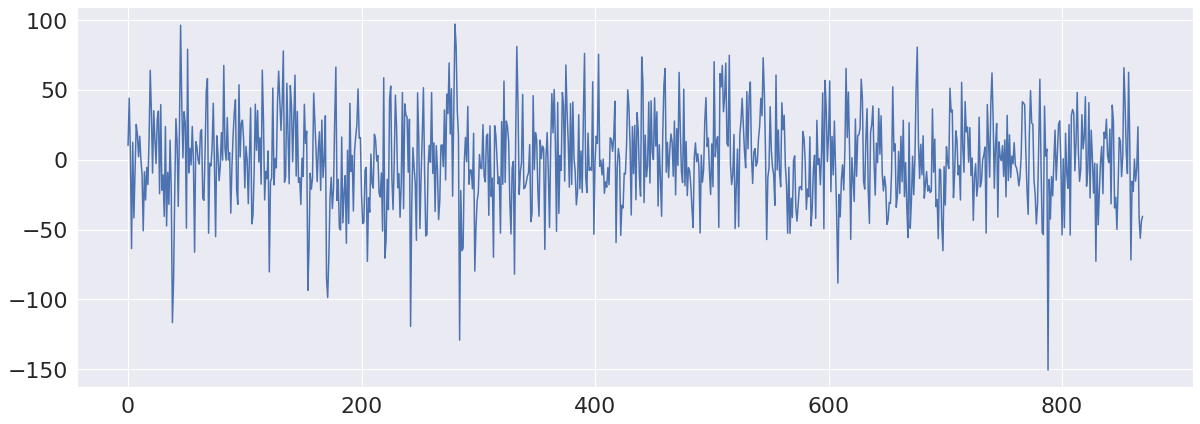

In [101]:
data['ISMR'].plot(kind='line', figsize=(20,7))

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SAM      870 non-null    float64
 1   nino     870 non-null    float64
 2   ISMR     870 non-null    float64
 3   AMO      870 non-null    float64
 4   NAO      870 non-null    float64
 5   PDO      870 non-null    float64
 6   At-nino  870 non-null    float64
 7   IOD      870 non-null    float64
dtypes: float64(8)
memory usage: 54.5 KB


In [103]:
features = [ 'nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD'] # skip SAM as it was told to omit in question
target = 'ISMR'

In [104]:
def give_lagged_dataset(X,y,lag):
    lX = pd.DataFrame(features)
    ly = pd.DataFrame([target])
    iX = []
    iY = []
    rows = X.shape[0]
    for i in range(rows):
        rem = i%6
        if(lag>rem):
            continue
        else:
            iX += [i-lag]
            iY += [i]
    lX = X.loc[iX]
    ly = y.loc[iY]
    return lX,ly

In [105]:
dX = data[features].iloc[:]
dy = data[target].iloc[:]

accs = 100000
best_lag = -1

lag_vs_acc_table = {"root mean squared error" : [], "lag" : []}

In [106]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = param_grid = {'C': [0.1,1,10],'kernel': ['rbf','linear','poly','sigmoid']}

In [107]:
def evaluate_model_for_a_lag_of(lag):
    X,y = give_lagged_dataset(dX,dy,lag)
    
    global accs
    global best_lag
    
    best_tuned_model = GridSearchCV(SVR(), param_grid, refit = True, verbose = 0)
 
    # fitting the model for grid search
    best_tuned_model.fit(X, y)
    ypred = best_tuned_model.predict(X)
    
    score = np.sqrt(mse(y,ypred))
    print(best_tuned_model.best_params_)

    
    lag_vs_acc_table["root mean squared error"] += [score]
    lag_vs_acc_table["lag"] += [lag]
    
    print('------------------------------------------------------')
    print("Root mean squared error is " + str(score) + " at a lag of "+str(lag) + " months")
    print('------------------------------------------------------')
    
    if(score < accs):
        best_lag = lag
        accs = score
    
    
    dat = {'True Values': y, "Predicted Values": ypred}
    df_res = pd.DataFrame()
    df_res = df_res.append(pd.DataFrame(data=dat),ignore_index=True)
    display(df_res)
    plt.figure(figsize=(16,9))
    plt.scatter(y=y,x=range(len(y)),label = 'True Values')
    plt.scatter(y=ypred,x=range(len(ypred)),label = "Predicted Values")
    plt.legend()
    
    plt.title("Lag of "+str(lag)+" months")
    plt.show()

{'C': 10, 'kernel': 'linear'}
------------------------------------------------------
Root mean squared error is 31.25854336603107 at a lag of 0 months
------------------------------------------------------


,True Values,Predicted Values
0,10.24380,1.479941
1,44.16110,-2.097494
2,4.76807,2.100304
3,-63.58770,-3.125109
4,12.57720,-9.754818
...,...,...
865,23.70850,-14.695662
866,-41.18450,-19.145450
867,-56.14030,-19.575045
868,-43.77540,-25.876901


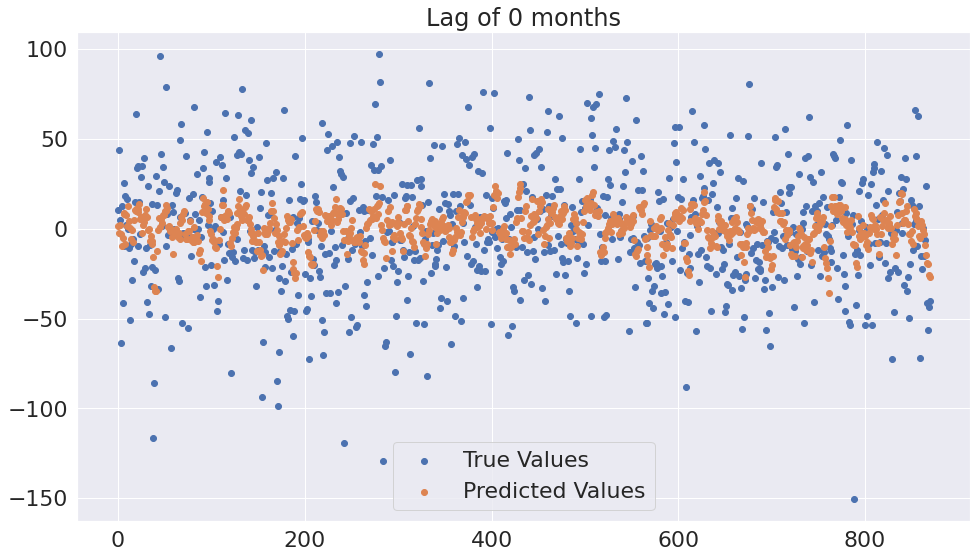

In [108]:
# ---------------
# lag of 0 months
# ---------------

evaluate_model_for_a_lag_of(0)


{'C': 1, 'kernel': 'linear'}
------------------------------------------------------
Root mean squared error is 33.45126867813457 at a lag of 1 months
------------------------------------------------------


,True Values,Predicted Values
0,44.16110,0.686612
1,4.76807,0.635985
2,-63.58770,-2.825275
3,12.57720,-6.323942
4,-41.57720,-8.764873
...,...,...
720,23.70850,-9.952099
721,-41.18450,-13.829692
722,-56.14030,-16.866366
723,-43.77540,-19.839251


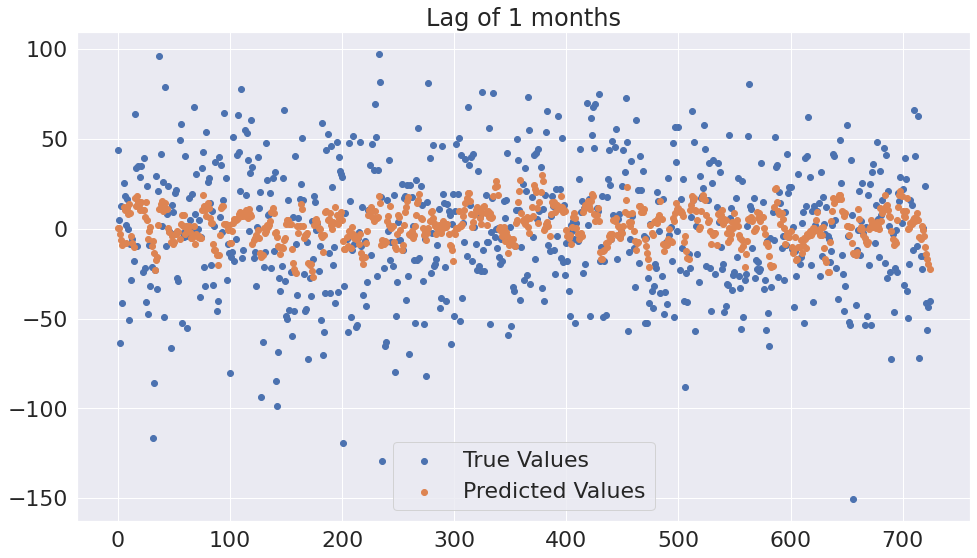

In [109]:
# ---------------
# lag of 1 months
# ---------------

evaluate_model_for_a_lag_of(1)

{'C': 10, 'kernel': 'linear'}
------------------------------------------------------
Root mean squared error is 33.91351759055602 at a lag of 2 months
------------------------------------------------------


,True Values,Predicted Values
0,4.76807,3.155331
1,-63.58770,8.500051
2,12.57720,1.622912
3,-41.57720,-7.304184
4,18.27740,8.031911
...,...,...
575,-15.23920,5.107856
576,-41.18450,-7.309965
577,-56.14030,-9.295984
578,-43.77540,-13.190078


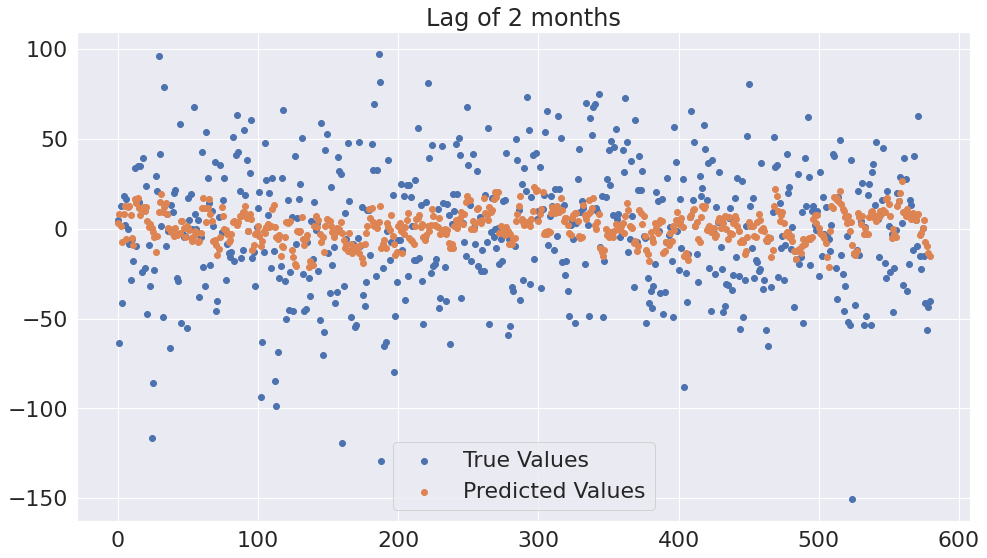

In [110]:
# ---------------
# lag of 2 months
# ---------------

evaluate_model_for_a_lag_of(2)

{'C': 1, 'kernel': 'poly'}
------------------------------------------------------
Root mean squared error is 33.505280548106576 at a lag of 3 months
------------------------------------------------------


,True Values,Predicted Values
0,-63.587700,-0.111665
1,12.577200,-1.695056
2,-41.577200,-0.324971
3,2.221670,-0.801147
4,16.886600,3.455851
...,...,...
430,0.515238,-2.645470
431,-15.239200,7.611423
432,-56.140300,-12.381169
433,-43.775400,-3.971676


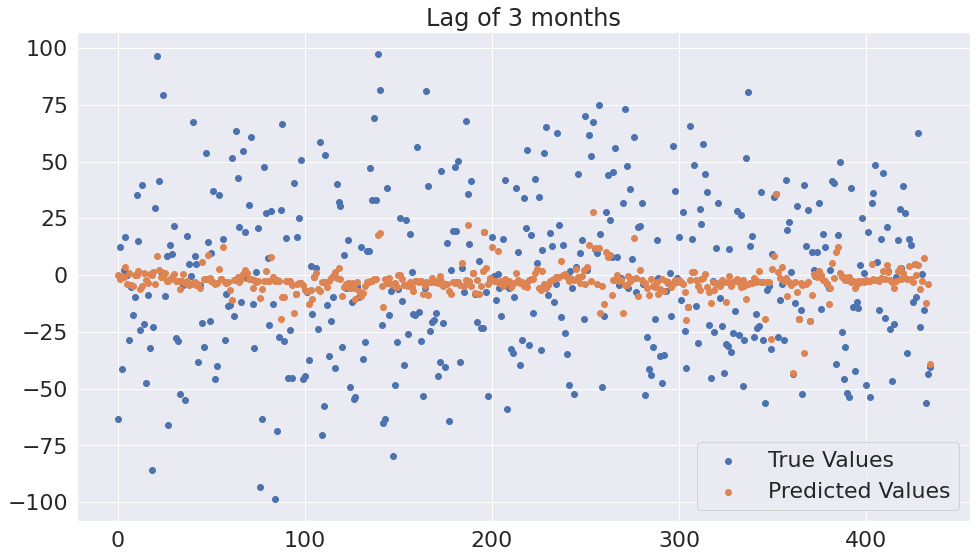

In [111]:
# ---------------
# lag of 3 months
# ---------------

evaluate_model_for_a_lag_of(3)

{'C': 1, 'kernel': 'linear'}
------------------------------------------------------
Root mean squared error is 32.11057202023747 at a lag of 4 months
------------------------------------------------------


,True Values,Predicted Values
0,12.577200,3.253046
1,-41.577200,4.844883
2,16.886600,1.079740
3,0.132196,4.059933
4,-5.404050,0.399794
...,...,...
285,62.651500,1.186245
286,0.515238,-3.948099
287,-15.239200,0.335134
288,-43.775400,-11.243449


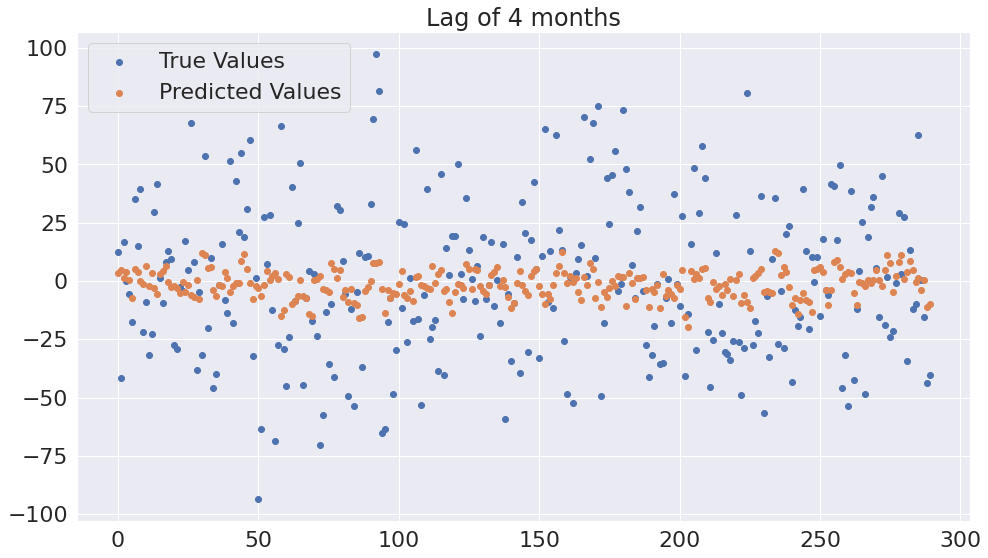

In [112]:
# ---------------
# lag of 4 months
# ---------------

evaluate_model_for_a_lag_of(4)

{'C': 1, 'kernel': 'poly'}
------------------------------------------------------
Root mean squared error is 26.77953949212468 at a lag of 5 months
------------------------------------------------------


,True Values,Predicted Values
0,-41.577200,-4.420305
1,0.132196,-4.584935
2,-17.658400,-11.198918
3,14.850900,-4.563045
4,-21.739700,-8.583181
...,...,...
140,-34.467200,-0.272632
141,-12.057900,-2.876329
142,62.651500,8.057379
143,-15.239200,-3.734187


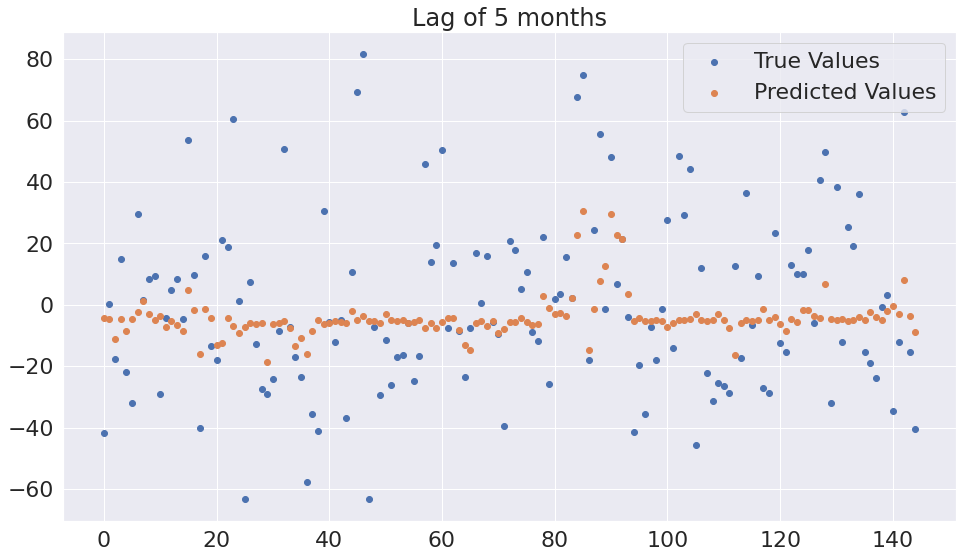

In [113]:
# ---------------
# lag of 5 months
# ---------------

evaluate_model_for_a_lag_of(5)

In [114]:
display(pd.DataFrame(lag_vs_acc_table))
print("=======================================")
print("So the best lag value is ", best_lag)
print("=======================================")

,root mean squared error,lag
0,31.258543,0
1,33.451269,1
2,33.913518,2
3,33.505281,3
4,32.110572,4
5,26.779539,5


So the best lag value is  5
